# CEARA X GREMIO DATA ANALYSIS

The objective of this analyisis is to work on data of brazilian football match between Ceará and Gremio, played on 2020 August 9th, and understand how data from the match can explain the result of the match


Find the commented video analysis for this match on my youtube channel, here: https://youtu.be/SBemQcGvc9g

In [13]:
#find last fixture
import http.client
import json
import pandas as pd
import numpy as np

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/fixtures/team/130/last/2", headers=headers)

res = conn.getresponse()
data = res.read()

fix=json.loads(data.decode("utf-8"))
fix = fix['api']['fixtures'][1]
with open('20200812_cea_gre_fix.txt','w') as outfile:
    json.dump(fix,outfile)
fix

{'fixture_id': 328003,
 'league_id': 1396,
 'league': {'name': 'Serie A',
  'country': 'Brazil',
  'logo': 'https://media.api-sports.io/football/leagues/71.png',
  'flag': 'https://media.api-sports.io/flags/br.svg'},
 'event_date': '2020-08-13T00:30:00+00:00',
 'event_timestamp': 1597278600,
 'firstHalfStart': 1597278600,
 'secondHalfStart': 1597282200,
 'round': 'Regular Season - 2',
 'status': 'Match Finished',
 'statusShort': 'FT',
 'elapsed': 90,
 'venue': 'Estádio Governador Plácido Aderaldo Castelo',
 'referee': 'Caio Max Augusto Vieira',
 'homeTeam': {'team_id': 129,
  'team_name': 'Ceara',
  'logo': 'https://media.api-sports.io/football/teams/129.png'},
 'awayTeam': {'team_id': 130,
  'team_name': 'Gremio',
  'logo': 'https://media.api-sports.io/football/teams/130.png'},
 'goalsHomeTeam': 1,
 'goalsAwayTeam': 1,
 'score': {'halftime': '1-0',
  'fulltime': '1-1',
  'extratime': None,
  'penalty': None}}

In [4]:
#Request statistical data from fixture
import http.client

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/statistics/fixture/328003/", headers=headers)

res = conn.getresponse()
data = res.read()

match=json.loads(data.decode("utf-8"))
with open('20200812_cea_gre_fixstat.txt','w') as outfile:
    json.dump(fix,outfile)
match

{'api': {'results': 16,
  'statistics': {'Shots on Goal': {'home': '5', 'away': '8'},
   'Shots off Goal': {'home': '5', 'away': '4'},
   'Total Shots': {'home': '11', 'away': '15'},
   'Blocked Shots': {'home': '1', 'away': '3'},
   'Shots insidebox': {'home': '8', 'away': '11'},
   'Shots outsidebox': {'home': '3', 'away': '4'},
   'Fouls': {'home': '17', 'away': '7'},
   'Corner Kicks': {'home': '1', 'away': '7'},
   'Offsides': {'home': '1', 'away': '0'},
   'Ball Possession': {'home': '42%', 'away': '58%'},
   'Yellow Cards': {'home': '3', 'away': '1'},
   'Red Cards': {'home': None, 'away': None},
   'Goalkeeper Saves': {'home': '7', 'away': '4'},
   'Total passes': {'home': '419', 'away': '576'},
   'Passes accurate': {'home': '340', 'away': '501'},
   'Passes %': {'home': '81%', 'away': '87%'}}}}

In [5]:
#Request statistical data from players on fixture
import http.client

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/players/fixture/328003", headers=headers)

res = conn.getresponse()
data = res.read()

match_palyers=json.loads(data.decode("utf-8"))
with open('20200812_cea_gre_plrstats.txt','w') as outfile:
    json.dump(match_palyers,outfile)
match_palyers

{'api': {'results': 30,
  'players': [{'event_id': 328003,
    'updateAt': 1597321203,
    'player_id': 9903,
    'player_name': 'Fernando Prass',
    'team_id': 129,
    'team_name': 'Ceara',
    'number': 1,
    'position': 'G',
    'rating': '8.0',
    'minutes_played': 90,
    'captain': 'False',
    'substitute': 'False',
    'offsides': None,
    'shots': {'total': 0, 'on': 0},
    'goals': {'total': 0, 'conceded': 1, 'assists': 0, 'saves': 7},
    'passes': {'total': 16, 'key': 0, 'accuracy': 88},
    'tackles': {'total': 0, 'blocks': 0, 'interceptions': 0},
    'duels': {'total': 1, 'won': 1},
    'dribbles': {'attempts': 0, 'success': 0, 'past': 0},
    'fouls': {'drawn': 0, 'committed': 0},
    'cards': {'yellow': 1, 'red': 0},
    'penalty': {'won': 0,
     'commited': 0,
     'success': 0,
     'missed': 0,
     'saved': 0}},
   {'event_id': 328003,
    'updateAt': 1597321203,
    'player_id': 10267,
    'player_name': 'Samuel Xavier',
    'team_id': 129,
    'team_name': '

In [14]:
times = [fix['homeTeam']['team_name'],fix['awayTeam']['team_name']]
gols = [fix['goalsHomeTeam'],fix['goalsAwayTeam']]
posse = [match['api']['statistics']['Ball Possession']['home'],match['api']['statistics']['Ball Possession']['away']]
chutes = [match['api']['statistics']['Total Shots']['home'],match['api']['statistics']['Total Shots']['away']]
chutes_a_gol = [int(chutes[0])-int(match['api']['statistics']['Shots off Goal']['home'])-int(match['api']['statistics']['Blocked Shots']['home']),
               int(chutes[1])-int(match['api']['statistics']['Shots off Goal']['away'])-int(match['api']['statistics']['Blocked Shots']['away'])]
amarelos = [match['api']['statistics']['Yellow Cards']['home'],match['api']['statistics']['Yellow Cards']['away']]
vermelhos = [match['api']['statistics']['Red Cards']['home'],match['api']['statistics']['Red Cards']['away']]
acerto_passes = [match['api']['statistics']['Passes %']['home'],match['api']['statistics']['Passes %']['away']]
chutes_dentro_area = [match['api']['statistics']['Shots insidebox']['home'],match['api']['statistics']['Shots insidebox']['away']]
chutes_fora_area = [match['api']['statistics']['Shots outsidebox']['home'],match['api']['statistics']['Shots outsidebox']['away']]
faltas = [match['api']['statistics']['Fouls']['home'],match['api']['statistics']['Fouls']['away']]
defesas_goleiro = [match['api']['statistics']['Goalkeeper Saves']['home'],match['api']['statistics']['Goalkeeper Saves']['away']]

In [15]:
geral = pd.DataFrame([gols, posse, chutes, chutes_a_gol, amarelos, vermelhos, acerto_passes,chutes_dentro_area,chutes_fora_area,
                     faltas,defesas_goleiro],
                     index=['Placar','Posse de bola','Chutes','Chutes no gol','Cartões amarelos','Cartões vermelhos','Passes acertados',
                           'Chutes dentro área','Chutes fora área','Faltas','Defesas do goleiro'],
                    columns = times)
print('Visão Geral')
geral

Visão Geral


,Ceara,Gremio
Placar,1,1
Posse de bola,42%,58%
Chutes,11,15
Chutes no gol,5,8
Cartões amarelos,3,1
Cartões vermelhos,None,None
Passes acertados,81%,87%
Chutes dentro área,8,11
Chutes fora área,3,4
Faltas,17,7


In [16]:
#Players data to dataframe
players_Df = pd.DataFrame(match_palyers['api']['players'])
players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,offsides,shots,goals,passes,tackles,duels,dribbles,fouls,cards,penalty
0,328003,1597321203,9903.0,Fernando Prass,129,Ceara,1,G,8.0,90,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 1, 'assists': 0, 'sav...","{'total': 16, 'key': 0, 'accuracy': 88}","{'total': 0, 'blocks': 0, 'interceptions': 0}","{'total': 1, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
1,328003,1597321203,10267.0,Samuel Xavier,129,Ceara,22,D,7.0,87,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 34, 'key': 1, 'accuracy': 82}","{'total': 3, 'blocks': 0, 'interceptions': 1}","{'total': 4, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
2,328003,1597321203,NaN,Gabriel Lacerda,129,Ceara,15,D,6.9,90,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 47, 'key': 0, 'accuracy': 87}","{'total': 0, 'blocks': 1, 'interceptions': 0}","{'total': 2, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
3,328003,1597321203,10265.0,Luiz Otávio,129,Ceara,13,D,6.9,90,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 64, 'key': 0, 'accuracy': 90}","{'total': 0, 'blocks': 0, 'interceptions': 1}","{'total': 5, 'won': 3}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
4,328003,1597321203,9378.0,Alyson,129,Ceara,14,D,7.0,90,...,1.0,"{'total': 1, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 2, 'accuracy': 59}","{'total': 4, 'blocks': 1, 'interceptions': 4}","{'total': 21, 'won': 12}","{'attempts': 4, 'success': 2, 'past': 4}","{'drawn': 1, 'committed': 3}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
5,328003,1597321203,77714.0,William Oliveira,129,Ceara,5,M,6.2,82,...,NaN,"{'total': 1, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 0, 'accuracy': 95}","{'total': 0, 'blocks': 0, 'interceptions': 1}","{'total': 6, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 4}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
6,328003,1597321203,65647.0,Charles,129,Ceara,35,M,6.9,90,...,NaN,"{'total': 1, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 36, 'key': 0, 'accuracy': 73}","{'total': 3, 'blocks': 0, 'interceptions': 1}","{'total': 14, 'won': 6}","{'attempts': 1, 'success': 1, 'past': 3}","{'drawn': 0, 'committed': 4}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
7,328003,1597321203,80171.0,Mateus Gonçalves,129,Ceara,7,M,7.0,87,...,NaN,"{'total': 2, 'on': 2}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 0, 'accuracy': 91}","{'total': 2, 'blocks': 0, 'interceptions': 0}","{'total': 11, 'won': 6}","{'attempts': 3, 'success': 3, 'past': 3}","{'drawn': 0, 'committed': 2}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
8,328003,1597321203,80187.0,Fernando Sobral,129,Ceara,88,M,7.0,90,...,NaN,"{'total': 0, 'on': 0}","{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 26, 'key': 1, 'accuracy': 78}","{'total': 4, 'blocks': 0, 'interceptions': 3}","{'total': 13, 'won': 8}","{'attempts': 2, 'success': 2, 'past': 2}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse..."
9,328003,1597321203,10292.0,Leandro Carvalho,129,Ceara,80,M,6.3,73,...,NaN,"{'total': 1, 'on': 1}","{

In [17]:
#Open shots data to columns
shots_Df = pd.DataFrame(players_Df['shots'])
shots_rows = []
for r in range(0,len(shots_Df)):
    shots_rows.append(list(shots_Df.loc[r,'shots'].values()))
    
open_shots = pd.DataFrame(shots_rows,columns=['total shots','on goal'])
n_players_Df = pd.concat([players_Df,open_shots],axis=1)
n_players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,goals,passes,tackles,duels,dribbles,fouls,cards,penalty,total shots,on goal
0,328003,1597321203,9903.0,Fernando Prass,129,Ceara,1,G,8.0,90,...,"{'total': 0, 'conceded': 1, 'assists': 0, 'sav...","{'total': 16, 'key': 0, 'accuracy': 88}","{'total': 0, 'blocks': 0, 'interceptions': 0}","{'total': 1, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
1,328003,1597321203,10267.0,Samuel Xavier,129,Ceara,22,D,7.0,87,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 34, 'key': 1, 'accuracy': 82}","{'total': 3, 'blocks': 0, 'interceptions': 1}","{'total': 4, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
2,328003,1597321203,NaN,Gabriel Lacerda,129,Ceara,15,D,6.9,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 47, 'key': 0, 'accuracy': 87}","{'total': 0, 'blocks': 1, 'interceptions': 0}","{'total': 2, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
3,328003,1597321203,10265.0,Luiz Otávio,129,Ceara,13,D,6.9,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 64, 'key': 0, 'accuracy': 90}","{'total': 0, 'blocks': 0, 'interceptions': 1}","{'total': 5, 'won': 3}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
4,328003,1597321203,9378.0,Alyson,129,Ceara,14,D,7.0,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 2, 'accuracy': 59}","{'total': 4, 'blocks': 1, 'interceptions': 4}","{'total': 21, 'won': 12}","{'attempts': 4, 'success': 2, 'past': 4}","{'drawn': 1, 'committed': 3}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0
5,328003,1597321203,77714.0,William Oliveira,129,Ceara,5,M,6.2,82,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 0, 'accuracy': 95}","{'total': 0, 'blocks': 0, 'interceptions': 1}","{'total': 6, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 4}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0
6,328003,1597321203,65647.0,Charles,129,Ceara,35,M,6.9,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 36, 'key': 0, 'accuracy': 73}","{'total': 3, 'blocks': 0, 'interceptions': 1}","{'total': 14, 'won': 6}","{'attempts': 1, 'success': 1, 'past': 3}","{'drawn': 0, 'committed': 4}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0
7,328003,1597321203,80171.0,Mateus Gonçalves,129,Ceara,7,M,7.0,87,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 22, 'key': 0, 'accuracy': 91}","{'total': 2, 'blocks': 0, 'interceptions': 0}","{'total': 11, 'won': 6}","{'attempts': 3, 'success': 3, 'past': 3}","{'drawn': 0, 'committed': 2}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",2,2
8,328003,1597321203,80187.0,Fernando Sobral,129,Ceara,88,M,7.0,90,...,"{'total': 0, 'conceded': 0, 'assists': 0, 'sav...","{'total': 26, 'key': 1, 'accuracy': 78}","{'total': 4, 'blocks': 0, 'interceptions': 3}","{'total': 13, 'won': 8}","{'attempts': 2, 'success': 2, 'past': 2}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0
9,328003,1597321203,10292.0,Leandro Carvalho,129,Ceara,80,M,6.3,73,...,"{'total': 0, 'conceded': 0, 'assists': 1, 'sav...","{'total': 16, 'key': 2, 'accuracy': 84}","{'total': 2, 'blocks': 0, 'interceptions': 0}","{'total': 14, 'won': 7}","{'attempts': 6, 'success': 2, 'past': 0}","{'drawn': 2, 'committed': 0}"

In [18]:
time = [fix['homeTeam']['team_name'],fix['awayTeam']['team_name']]
position = list(set(n_players_Df['position']))
shots_position=[]

for p in position:
    shots_aux = []
    for t in time:
        shots_aux.append(n_players_Df[(n_players_Df['position']==p) & (n_players_Df['team_name']==t)]['total shots'].sum())
        
    shots_position.append(shots_aux)

shots_position_df = pd.DataFrame(shots_position, index=position, columns = time)
print('Shots by team and position')
shots_position_df
        
        

Shots by team and position


,Ceara,Gremio
F,5,5
M,5,8
G,0,0
D,1,2


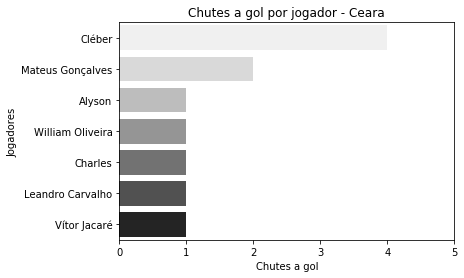

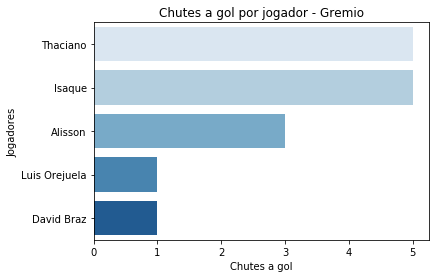

In [24]:
#Total shots by player
import seaborn as sns
import matplotlib.pyplot as plt

home_player_shots=n_players_Df[n_players_Df['team_name']==fix['homeTeam']['team_name']][['total shots','player_name','team_name']]
home_player_shots = home_player_shots[home_player_shots['total shots']>0].sort_values(by=['total shots'],ascending=False)
home_graph = sns.barplot(x=home_player_shots['total shots'],y=home_player_shots['player_name'],palette='Greys')
home_graph.set(ylabel='Jogadores',xlabel='Chutes a gol',title = 'Chutes a gol por jogador - '+fix['homeTeam']['team_name'])
plt.xlim(0,5)
plt.show()

away_player_shots=n_players_Df[n_players_Df['team_name']==fix['awayTeam']['team_name']][['total shots','player_name','team_name']]
away_player_shots = away_player_shots[away_player_shots['total shots']>0].sort_values(by=['total shots'],ascending=False)
away_graph = sns.barplot(x=away_player_shots['total shots'],y=away_player_shots['player_name'],palette='Blues')
away_graph.set(ylabel='Jogadores',xlabel='Chutes a gol',title = 'Chutes a gol por jogador - '+fix['awayTeam']['team_name'])
plt.show()


In [25]:
#passes
passes_Df = pd.DataFrame(players_Df['passes'])
passes_rows = []
for r in range(0,len(passes_Df)):
    passes_rows.append(list(passes_Df.loc[r,'passes'].values()))
    
open_passes = pd.DataFrame(passes_rows,columns=['total passes','keys','accuracy'])
n_players_Df = pd.concat([n_players_Df,open_passes],axis=1)
n_players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,duels,dribbles,fouls,cards,penalty,total shots,on goal,total passes,keys,accuracy
0,328003,1597321203,9903.0,Fernando Prass,129,Ceara,1,G,8.0,90,...,"{'total': 1, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,16,0,88
1,328003,1597321203,10267.0,Samuel Xavier,129,Ceara,22,D,7.0,87,...,"{'total': 4, 'won': 3}","{'attempts': 0, 'success': 0, 'past': 1}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,34,1,82
2,328003,1597321203,NaN,Gabriel Lacerda,129,Ceara,15,D,6.9,90,...,"{'total': 2, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,47,0,87
3,328003,1597321203,10265.0,Luiz Otávio,129,Ceara,13,D,6.9,90,...,"{'total': 5, 'won': 3}","{'attempts': 1, 'success': 1, 'past': 0}","{'drawn': 0, 'committed': 0}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,64,0,90
4,328003,1597321203,9378.0,Alyson,129,Ceara,14,D,7.0,90,...,"{'total': 21, 'won': 12}","{'attempts': 4, 'success': 2, 'past': 4}","{'drawn': 1, 'committed': 3}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,22,2,59
5,328003,1597321203,77714.0,William Oliveira,129,Ceara,5,M,6.2,82,...,"{'total': 6, 'won': 1}","{'attempts': 0, 'success': 0, 'past': 4}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,22,0,95
6,328003,1597321203,65647.0,Charles,129,Ceara,35,M,6.9,90,...,"{'total': 14, 'won': 6}","{'attempts': 1, 'success': 1, 'past': 3}","{'drawn': 0, 'committed': 4}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,36,0,73
7,328003,1597321203,80171.0,Mateus Gonçalves,129,Ceara,7,M,7.0,87,...,"{'total': 11, 'won': 6}","{'attempts': 3, 'success': 3, 'past': 3}","{'drawn': 0, 'committed': 2}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",2,2,22,0,91
8,328003,1597321203,80187.0,Fernando Sobral,129,Ceara,88,M,7.0,90,...,"{'total': 13, 'won': 8}","{'attempts': 2, 'success': 2, 'past': 2}","{'drawn': 1, 'committed': 1}","{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,26,1,78
9,328003,1597321203,10292.0,Leandro Carvalho,129,Ceara,80,M,6.3,73,...,"{'total': 14, 'won': 7}","{'attempts': 6, 'success': 2, 'past': 0}","{'drawn': 2, 'committed': 0}","{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,1,16,2,84


In [26]:
#passes
time = [fix['homeTeam']['team_name'],fix['awayTeam']['team_name']]
position = list(set(n_players_Df['position']))
columns = ['Home_passes','Home_keys','Home_acc','Away_passes','Away_keys','Away_acc']
passes_position = []

for p in position:
    passes_aux = []
    for t in time:
        passes_aux.append(n_players_Df[(n_players_Df['team_name']==t)& (n_players_Df['position']==p)]['total passes'].sum())
        passes_aux.append(n_players_Df[(n_players_Df['team_name']==t)& (n_players_Df['position']==p)]['keys'].sum())
        
        pass_list=[]
        acc_list=[]
        for i in n_players_Df[(n_players_Df['team_name']==t)& (n_players_Df['position']==p)].index:
            pass_list.append(n_players_Df.loc[i,'total passes'])
            acc_list.append(n_players_Df.loc[i,'accuracy'])
            
        lists = pass_list, acc_list
        passes_aux.append(sum([x * y for x, y in zip(*lists)])/sum(pass_list))
    
    passes_position.append(passes_aux)
    
passes_position_df = pd.DataFrame(passes_position, index=position, columns = columns)
passes_position_df
        

,Home_passes,Home_keys,Home_acc,Away_passes,Away_keys,Away_acc
F,26,2,76.615385,22,1,88.000000
M,127,3,81.905512,256,10,89.976562
G,16,0,88.000000,8,0,44.000000
D,171,3,82.660819,215,1,86.190698


In [27]:
passes_sum = pd.DataFrame([[passes_position_df[columns[0]].sum(),passes_position_df[columns[1]].sum(),passes_position_df[columns[2]].sum(),
                          passes_position_df[columns[3]].sum(),passes_position_df[columns[4]].sum(),passes_position_df[columns[5]].sum()]],
                         index=['Total'],columns = columns)
passes_sum


,Home_passes,Home_keys,Home_acc,Away_passes,Away_keys,Away_acc
Total,340,8,329.181715,501,12,308.16726


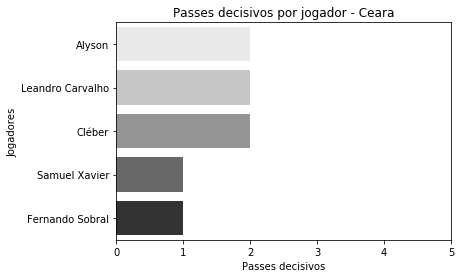

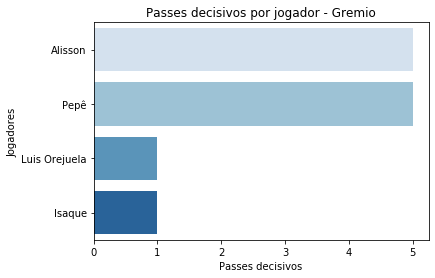

In [30]:
#Key passes by player
home_player_passes=n_players_Df[n_players_Df['team_name']==fix['homeTeam']['team_name']][['keys','player_name','team_name']]
home_player_passes = home_player_passes[home_player_passes['keys']>0].sort_values(by=['keys'],ascending=False)
home_graph = sns.barplot(x=home_player_passes['keys'],y=home_player_passes['player_name'],palette = 'Greys')
home_graph.set(ylabel='Jogadores',xlabel='Passes decisivos',title = 'Passes decisivos por jogador - '+fix['homeTeam']['team_name'])
plt.xlim(0,5)
plt.show()

away_player_passes=n_players_Df[n_players_Df['team_name']==fix['awayTeam']['team_name']][['keys','player_name','team_name']]
away_player_passes = away_player_passes[away_player_passes['keys']>0].sort_values(by=['keys'],ascending=False)
away_graph = sns.barplot(x=away_player_passes['keys'],y=away_player_passes['player_name'],palette = 'Blues')
away_graph.set(ylabel='Jogadores',xlabel='Passes decisivos',title = 'Passes decisivos por jogador - '+fix['awayTeam']['team_name'])
plt.show()

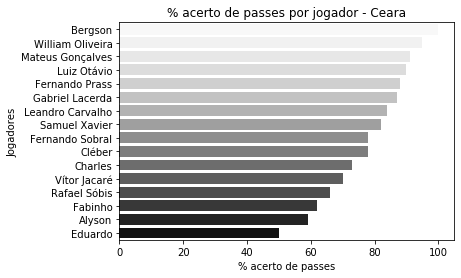

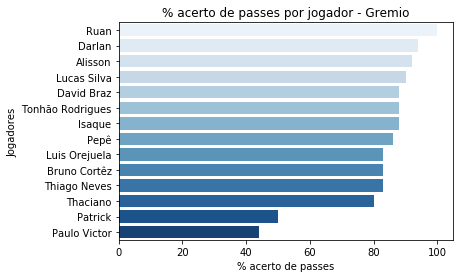

In [32]:
home_player_passes=n_players_Df[n_players_Df['team_name']==fix['homeTeam']['team_name']][['accuracy','player_name','team_name']]
home_player_passes = home_player_passes[home_player_passes['accuracy']>0].sort_values(by=['accuracy'],ascending=False)
home_graph = sns.barplot(x=home_player_passes['accuracy'],y=home_player_passes['player_name'],palette = 'Greys')
home_graph.set(ylabel='Jogadores',xlabel='% acerto de passes',title = '% acerto de passes por jogador - '+fix['homeTeam']['team_name'])
plt.show()

away_player_passes=n_players_Df[n_players_Df['team_name']==fix['awayTeam']['team_name']][['accuracy','player_name','team_name']]
away_player_passes = away_player_passes[away_player_passes['accuracy']>0].sort_values(by=['accuracy'],ascending=False)
away_graph = sns.barplot(x=away_player_passes['accuracy'],y=away_player_passes['player_name'],palette = 'Blues')
away_graph.set(ylabel='Jogadores',xlabel='% acerto de passes',title = '% acerto de passes por jogador - '+fix['awayTeam']['team_name'])
plt.show()

In [33]:
#tackles
tackles_Df = pd.DataFrame(players_Df['tackles'])
tackles_rows = []
for r in range(0,len(tackles_Df)):
    tackles_rows.append(list(tackles_Df.loc[r,'tackles'].values()))
    
open_tackles = pd.DataFrame(tackles_rows,columns=['Desarmes','bloqueios','interceptações'])
n_players_Df = pd.concat([n_players_Df,open_tackles],axis=1)
n_players_Df

,event_id,updateAt,player_id,player_name,team_id,team_name,number,position,rating,minutes_played,...,cards,penalty,total shots,on goal,total passes,keys,accuracy,Desarmes,bloqueios,interceptações
0,328003,1597321203,9903.0,Fernando Prass,129,Ceara,1,G,8.0,90,...,"{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,16,0,88,0,0,0
1,328003,1597321203,10267.0,Samuel Xavier,129,Ceara,22,D,7.0,87,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,34,1,82,3,0,1
2,328003,1597321203,NaN,Gabriel Lacerda,129,Ceara,15,D,6.9,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,47,0,87,0,1,0
3,328003,1597321203,10265.0,Luiz Otávio,129,Ceara,13,D,6.9,90,...,"{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,64,0,90,0,0,1
4,328003,1597321203,9378.0,Alyson,129,Ceara,14,D,7.0,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,22,2,59,4,1,4
5,328003,1597321203,77714.0,William Oliveira,129,Ceara,5,M,6.2,82,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,22,0,95,0,0,1
6,328003,1597321203,65647.0,Charles,129,Ceara,35,M,6.9,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,0,36,0,73,3,0,1
7,328003,1597321203,80171.0,Mateus Gonçalves,129,Ceara,7,M,7.0,87,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",2,2,22,0,91,2,0,0
8,328003,1597321203,80187.0,Fernando Sobral,129,Ceara,88,M,7.0,90,...,"{'yellow': 0, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",0,0,26,1,78,4,0,3
9,328003,1597321203,10292.0,Leandro Carvalho,129,Ceara,80,M,6.3,73,...,"{'yellow': 1, 'red': 0}","{'won': 0, 'commited': 0, 'success': 0, 'misse...",1,1,16,2,84,2,0,0


In [34]:
tackles_players = n_players_Df[n_players_Df['position']=='D'][['player_name','team_name','Desarmes', 'bloqueios','interceptações']]
tackles_players

,player_name,team_name,Desarmes,bloqueios,interceptações
1,Samuel Xavier,Ceara,3,0,1
2,Gabriel Lacerda,Ceara,0,1,0
3,Luiz Otávio,Ceara,0,0,1
4,Alyson,Ceara,4,1,4
11,Eduardo,Ceara,0,0,0
17,Luis Orejuela,Gremio,2,0,1
18,David Braz,Gremio,3,1,1
19,Tonhão Rodrigues,Gremio,3,0,2
20,Bruno Cortêz,Gremio,0,0,2
27,Ruan,Gremio,0,0,0


In [35]:
tackles_players = n_players_Df[['player_name','position','team_name','Desarmes', 'bloqueios','interceptações']]
tackles_players

,player_name,position,team_name,Desarmes,bloqueios,interceptações
0,Fernando Prass,G,Ceara,0,0,0
1,Samuel Xavier,D,Ceara,3,0,1
2,Gabriel Lacerda,D,Ceara,0,1,0
3,Luiz Otávio,D,Ceara,0,0,1
4,Alyson,D,Ceara,4,1,4
5,William Oliveira,M,Ceara,0,0,1
6,Charles,M,Ceara,3,0,1
7,Mateus Gonçalves,M,Ceara,2,0,0
8,Fernando Sobral,M,Ceara,4,0,3
9,Leandro Carvalho,M,Ceara,2,0,0


Ceara's GoalKeeper made 7 saves during the game, being this one of the reasons for Gremio having so many opportunities and not winning the match. So, let's get data from Fernando Prass last season and check what is his average save by match so we can compare with this match.

In [36]:
#Fernando Prass statistics

conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "ffb5742c9dmsh99722e642ef88b5p1ecdc4jsn3a869f379168"
    }

conn.request("GET", "/v2/players/player/9903/2017", headers=headers)

res = conn.getresponse()
data = res.read()

prass=json.loads(data.decode("utf-8"))
with open('20200812_cea_gre_prass.txt','w') as outfile:
    json.dump(prass,outfile)
prass


{'api': {'results': 3,
  'players': [{'player_id': 9903,
    'player_name': 'Fernando Prass',
    'firstname': 'Fernando Büttenbender',
    'lastname': 'Prass',
    'number': None,
    'position': 'Goalkeeper',
    'age': 42,
    'birth_date': '09/07/1978',
    'birth_place': 'Porto Alegre',
    'birth_country': 'Brazil',
    'nationality': 'Brazil',
    'height': '191 cm',
    'weight': '79 kg',
    'injured': None,
    'rating': '7.093333',
    'team_id': 121,
    'team_name': 'Palmeiras',
    'league': 'Paulista A1',
    'season': '2017',
    'captain': 1,
    'shots': {'total': 0, 'on': 0},
    'goals': {'total': 0, 'conceded': 10, 'assists': 0, 'saves': 40},
    'passes': {'total': 224, 'key': 1, 'accuracy': 64},
    'tackles': {'total': 0, 'blocks': 0, 'interceptions': 2},
    'duels': {'total': 8, 'won': 8},
    'dribbles': {'attempts': 0, 'success': 0},
    'fouls': {'drawn': 2, 'committed': 0},
    'cards': {'yellow': 1, 'yellowred': 0, 'red': 0},
    'penalty': {'won': 0,
   

In [41]:
prass_2017_A = list(filter(lambda p: p['league'] in ['Serie A'],prass['api']['players']))
saves = prass_2017_A[0]['goals']['saves']
appearences = prass_2017_A[0]['games']['appearences']
avg_saves = saves/appearences
print('Average saves in 2017: ' + str(round(avg_saves,2)))
print('Saves in the match: ' + str(match_palyers['api']['players'][0]['goals']['saves']))

Average saves in 2017: 2.82
Saves in the match: 7
